In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdChemReactions

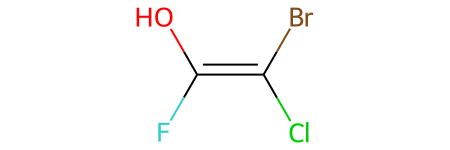

In [19]:
vinyl_smiles = "OC(F)=C(Cl)Br"
monomer = Chem.MolFromSmiles(vinyl_smiles)
monomer

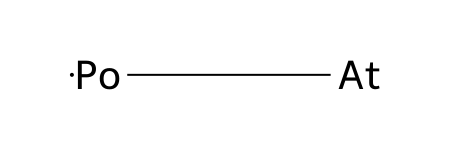

In [18]:
helper = Chem.MolFromSmiles("[Po]-[At]")
helper

### Initiation (vinyl)

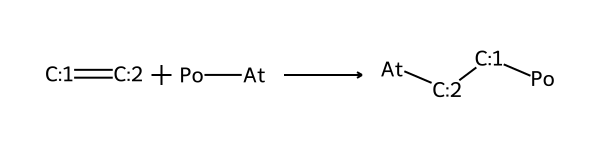

In [20]:
initiation = rdChemReactions.ReactionFromSmarts(
    "[C:1]=[C:2].[Po]-[At]>>[Po]-[C:1]-[C:2]-[At]"
)
initiation

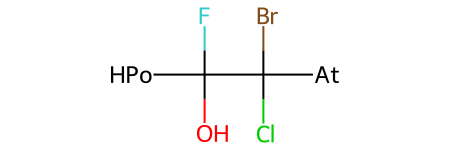

In [22]:
# first step (dp 0 to dp 1)
dp1 = initiation.RunReactants((monomer, helper))[0][0]
dp1

### Propagation reaction (should work for everything)

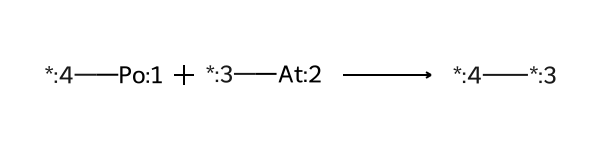

In [24]:
prop = rdChemReactions.ReactionFromSmarts(
    "[*:4]-[Po:1].[At:2]-[*:3]>>[*:4]-[*:3]"
)
prop

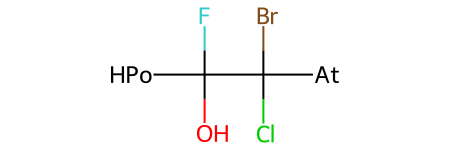

In [25]:
dp1

In [26]:
products = [item[0] for item in prop.RunReactants((dp1, dp1))]
products

[08:52:55] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 1 2 


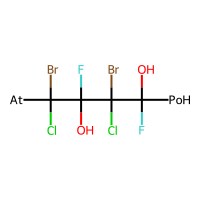

In [27]:
from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage(products, molsPerRow=1)

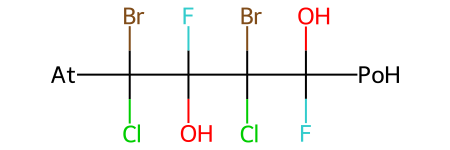

In [28]:
dp2 = products[0]
dp2

In [29]:
dp3 = prop.RunReactants((dp1, dp2))[0][0]
dp3

### Replace end groups with CH3s

In [30]:
replaceAt = rdChemReactions.ReactionFromSmarts(
    "[At:1]>>[C:1]"
)
replacePo = rdChemReactions.ReactionFromSmarts(
    "[Po:1]>>[C:1]"
)

In [31]:
replaceAt.RunReactantInPlace(dp3)

True

In [32]:
replacePo.RunReactantInPlace(dp3)

True

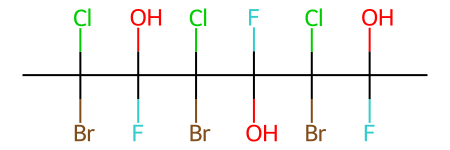

In [33]:
dp3